# Учебный проект 16_Классификация комментариев магазина "Викишоп"

## Содержание

* [Описание проекта](#Описание)
* [Импорт библиотек Python](#Импорт)
* [Загрузка данных](#Загрузка)
* [Обработка текстовых данных](#Обработка)
* [Построение моделей машинного обучения](#Моделирование)
    * [Подготовка данных](#Моделирование_подготовка)
    * [Подготовка набора моделей и обучение на тренировочных данных](#Моделирование_обучение)
    * [Выбор лучшей модели и оценка на тестовом наборе данных](#Моделирование_тестирование)
* [Общий вывод](#Вывод)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные с `информацией о комментариях на странице магазина`, которые были предоставлены руководством компании "Викишоп".

---

`Задача`

Разработать модель машинного обучения для **классификации комментариев на позитивные и негативные** с целью дальнейшей модерации токсичных комментариев. Необходимо, чтобы результат модели на метрике F1 был **не меньше 0.75**.

---

`Путь решения`

1. Собрать исторические данные о комментариях на сайте магазина;
2. Провести предобработку значений в наборе данных;
3. Построить модель BERT для анализа семантики текста;
4. Оценить качество модели BERT на метрике F1;
5. Сформировать вывод о подготовленных решениях.

---

`Располагаемые данные`

**комментарии на странице магазина - toxic_comments**
* text - содержание комментария пользователя;
* toxic - таргет: является ли комментарий токсичным.

## Импорт библиотек Python <a class = 'anchor' id = 'Импорторт'></a>

Данный блок характеризуется следующими последовательными действиями:
1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
    * для исследования временных рядов;
    * для решения задач машинного обучения:
        * модель линейной регрессии;
        * метрики оценки эффективности моделей;
        * механизмы отбора данных данных.
2. Инициализация переменных-констант для последующего использования на этапе построения моделей МО;
3. Формирование вывода по итогам данного этапа.

In [1]:
!pip install nltk --upgrade


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# импорт библиотек python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# для анализа и обработки текста
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# инструменты машинного обучения

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# метрики оценки эффективности моделей
from sklearn.metrics import f1_score, confusion_matrix

# вспомогательные механизмы для задач машинного обучения
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils import shuffle

# игнорирование возможных предупреждений
import warnings
warnings.filterwarnings("ignore")

# для получения пути к директории
import os

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\k.storozhuk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\k.storozhuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# инициализация констант для дальнейшего использования в проекте
# инициализация переменной RANDOM_STATE для фиксирования случайности
# инициализация переменной TEST_SIZE для фиксирования размера тестовой выборки при разбиении наборов данных
RANDOM_STATE = 42
TEST_SIZE = 0.25

**Вывод**

1. Импортированы библиотеки Python:
    * для манипулирования данными:
        * pandas;
        * numpy.
    * для визуализации данных:
        * matplotlib.pyplot;
        * seaborn.
    * для решения задач машинного обучения:
        * модели машинного обучения:
            * LogisticRegression - модель логистической регрессии;
            * DecisionTreeClassifier - модель дерева решений;
        * метрики оценки эффективности моделей классификации:
            * f1_score - взвешенная метрика F1
        * механизмы анализа и обработки текста:
            * CountVectorizer - инструмент для векторизации текста на основе подсчета слов;
            * re - модуль для работы с регулярными выражениями;
            * nltk - библиотека для обработки естественного языка;
            * stopwords - список стоп-слов.
        * вспомогательные механизмы для задач машинного обучения:
            * train_test_split - механизм разделения данных;
            * RandomizedSearchCV - механизм поиска гиперпараметров со случайным перебором значений;
            * cross_val_score - механизм кросс-валидации;
            * shuffle - механизм перемешивания данных.
    * для отключения предупреждений.
2. Инициализированы переменные:
    * **TEST_SIZE** для фиксирования размера тестовой выборки при разбиении наборов данных;
    * **RANDOM_STATE** для фиксирования случайности.

## Загрузка данных <a class = 'anchor' id = 'Загрузка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Загрузка данных в рабочую среду Jupyter Notebook - инициализация переменной **comments**;
2. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных.
3. Вывод на экран баланса классов по целевой переменной;
4. Формирование вывода по итогам данного этапа.

In [ ]:
# загрузка данных в рабочую среду

try:
    dataset_path = os.path.join('..', 'Datasets', 'toxic_comments.csv')
    comments = pd.read_csv(dataset_path)
except:
    comments = pd.read_csv('/datasets/toxic_comments.csv')

In [5]:
# инициализация пользовательской функции для первичного изучения содержимого наборов данных
def first_meeting (df : pd.DataFrame, df_name : str) -> None:
    print(f'Структура набора данных {df_name}')
    display(df.head())
    print('Общая информация о наборе')
    print(df.info())
    print()

In [6]:
# вывод на экран параметров датасета 'taxi'
first_meeting(comments, 'toxic_comments')

Структура набора данных toxic_comments


,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB
None



In [7]:
# исключение столбца 'Unnamed: 0' из набора данных
comments = comments.drop('Unnamed: 0', axis=1)

In [8]:
# анализ баланса классов в наборе данных 'toxic_comments'
comments['toxic'].value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

toxic
0    89.84%
1    10.16%
Name: proportion, dtype: object

**Вывод**

1. Данные загружены в рабочую среду Jupyter Notebook. Инициализирована переменная **comments**;
2. Выведена на экран общая информация о наборе данных:
    * В наборе данных **отсутствуют пустые значения**;
    * В наборе данных **159_292 строк**;
    * В наборе данных **2 столбца**:
        * text - содержание комментария пользователя;
        * toxic - таргет: является ли комментарий токсичным.
3. Баланс классов в столбце **toxic** составляет:
    * 0 - 89.84%;
    * 1 - 10.16%.
4. Столбец 'Unnamed: 0' удален из набора данных по причине повторения индексации записей.

При разделении набора данных на обучающую и тестовую выборки необходимо учитывать стратификацию по целевой переменной. В таком случае, разбиение будет произведено с сохранением пропорций классов.

## Обработка текстовых данных <a class = 'anchor' id = 'Обработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Приведение значений в столбец 'text' к нижнему регистру;
2. Инициализация пользовательской функции **clear_text** для удаления лишних символов. Применение функции к значениям столбца 'text';
3. Инициализация пользовательской функции для лемматизации текста: **lemmatize_text**;
4. Применение функции к столбцу 'text' набора данных;
5. Подготовка мешка слов и проведение обработки стоп-слов;
6. Формирование области признаков и вектора целевой переменной - инициализация переменных **X** и **y** соответственно;
7. Формирование вывода по итогам данного этапа.

In [9]:
# приведение значений в столбце 'text' к нижнему регистру
comments['text'] = comments['text'].str.lower()

In [10]:
# очистка текста от лишних символов
def clear_text(text : str) -> str:
    # очистка текста от лишних символов
    text = re.sub(r'[^a-zA-Z ]', ' ', text)
    # очистка текста от лишних пробелов
    text = ' '.join(text.split())
    # возврат очищенного текста
    return text

# применение функции очистки текста к столбцу 'text' датасета
comments['text'] = comments['text'].apply(clear_text)

In [11]:
# инициализация пользовательской функции лемматизации текста в наборе данных
def lemmatize_text(text : str) -> str:
    # инициализация экземпляра класса WordNetLemmatizer для лемматизации текста
    lemmatizer = nltk.WordNetLemmatizer()
    # инициализация переменной для хранения лемматизированного текста
    lemmatized_text = []
    # инициализация переменной для хранения слов в тексте
    words = text.split()
    # цикл по всем словам в тексте
    for word in words:
        # лемматизация слова
        lemmatized_word = lemmatizer.lemmatize(word)
        # добавление лемматизированного слова в список
        lemmatized_text.append(lemmatized_word)
    # объединение лемматизированных слов в строку
    lemmatized_text = ' '.join(lemmatized_text)
    # возврат лемматизированного текста
    return lemmatized_text

In [12]:
# обработка текстовых значений в столбце 'text' датасета
comments['text'] = comments['text'].apply(lemmatize_text)

In [13]:
# создание мешка слов и обработка стоп-слов
stop_words = list(stopwords.words('english'))
count_vectorizer = CountVectorizer(stop_words = stop_words)
bow = count_vectorizer.fit_transform(comments['text'])

In [14]:
# формирование области признаков и вектора целевой переменной
X = bow
y = comments['toxic']

**Вывод**

1. Значения в столбце 'text' приведены к нижнему регистру;
2. Проведена инициализация пользовательской функции **clear_text** для удаления лишних символов. **Все символы, кроме латинских букв и пробелов удалены из текста**;
3. Инициализирована пользовательская функция для лемматизации текста: **lemmatize_text**. Функция применена к столбцу 'text' набора данных;
4. Подготовлен мешок слов и проведена обработка стоп-слов;
5. Сформирована область признаков и вектор целевой переменной - инициализированы переменные **X** и **y** соответственно.

## Построение моделей машинного обучения <a class = 'anchor' id = 'Моделирование'></a>

Данный раздел содержит в себе следующие этапы:

1. Подготовка данных:
    * разделение набора данных на обучающую и тестовую выборки;
2. Подготовка набора моделей и обучение на тренировочных данных:
    * инициализация моделей:
        * LogisticRegression - модель логистической регрессии;
        * SVC - модель опорных векторов;
        * DecisionTreeClassifier - модель дерева решений;
        * RandomForestClassifier - модель случайного леса;
        * CatBoostClassifier - модель CatBoost;
    * обучение моделей на тренировочных данных;
3. Выбор лучшей модели и оценка на тестовом наборе данных:
    * выбор лучшей модели на основе метрики F1;
    * оценка качества лучшей модели на тестовом наборе данных;
    * формирование вывода по итогам данного этапа.

### Подготовка данных <a class = 'anchor' id = 'Моделирование_подготовка'></a>

In [15]:
# разделение набора данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE, stratify = y)

In [16]:
# проверка сохранения баланса классов в обучающем векторе целевой переменной
print('Баланс классов в обучающем вектиоре целевой переменной')
display(y_train.value_counts(normalize = True).mul(100).round(2).astype(str) + '%')

print('Баланс классов в тестовом вектиоре целевой переменной')
display(y_test.value_counts(normalize = True).mul(100).round(2).astype(str) + '%')

Баланс классов в обучающем вектиоре целевой переменной


toxic
0    89.84%
1    10.16%
Name: proportion, dtype: object

Баланс классов в тестовом вектиоре целевой переменной


toxic
0    89.84%
1    10.16%
Name: proportion, dtype: object

### Подготовка набора моделей и обучение на тренировочных данных <a class = 'anchor' id = 'Моделирование_обучение'></a>

In [17]:
# инициализация словаря моделей с переданными значениями гиперпараметров

models = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'params' : {
            'random_state' : [RANDOM_STATE],
            'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
            'class_weight' : ['balanced']
        }
    },
    'DecisionTreeClassifier' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'random_state' : [RANDOM_STATE],
            'class_weight' : ['balanced'],
            'max_depth' : [5, 10, 15, 20, None],
            'min_samples_split' : [2, 5, 10],
            'min_samples_leaf' : [1, 2, 4]
        }
    }
}

In [21]:
# основной цикл обучения моделей

results = {}

for name, config in models.items():
    print(f"\n=== {name} ===")    # инициализация модели и параметров для поиска гиперпараметров

    # инициализация объекта RandomizedSearchCV
    randCV = RandomizedSearchCV(
        estimator=config['model'],
        param_distributions=config['params'],
        scoring='f1',
        cv=3,
        n_jobs=-1,
        verbose=1,
        n_iter=10  # Количество случайных комбинаций для проверки
    )
    
    try:
        # запуск обучения модели с использованием RandomizedSearchCV
        randCV.fit(X_train, y_train)
    
        # сохранение результатов обучения модели
        results[name] = {
            'best_score': randCV.best_score_,
            'best_params': randCV.best_params_,
            'model': randCV.best_estimator_
        }

        print(f"Лучшие параметры: {randCV.best_params_}")
        print(f"Среднее F1-score по CV: {randCV.best_score_:.2f}")

    except Exception as e:
        print(f"Ошибка при обучении модели {name}: {str(e)}")
        results[name] = {'best_params': None, 'best_score': np.inf}

# итоговый вывод результатов обучения

print("\n" + "="*50)
print("ИТОГИ: Сравнение моделей по F1-SCORE")
print("="*50)

# Сортировка моделей по качеству

sorted_results = sorted(results.items(), key=lambda x: x[1]['best_score'])

for name, res in sorted_results:
    print(f"{name}: F1-SCORE = {res['best_score']:.2f}")
    print(f"  Параметры: {res['best_params']}\n")

# определение лучшей модели

best_model = max(results, key=lambda x: results[x]['best_score'])

print("\nЛУЧШАЯ МОДЕЛЬ:")
print(f"Модель: {best_model}")
print(f"F1-SCORE: {results[best_model]['best_score']:.2f}")
print(f"Оптимальные параметры: {results[best_model]['best_params']}")


=== LogisticRegression ===
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Лучшие параметры: {'solver': 'newton-cg', 'random_state': 42, 'class_weight': 'balanced'}
Среднее F1-score по CV: 0.76

=== DecisionTreeClassifier ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Лучшие параметры: {'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'class_weight': 'balanced'}
Среднее F1-score по CV: 0.60

ИТОГИ: Сравнение моделей по F1-SCORE
DecisionTreeClassifier: F1-SCORE = 0.60
  Параметры: {'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'class_weight': 'balanced'}

LogisticRegression: F1-SCORE = 0.76
  Параметры: {'solver': 'newton-cg', 'random_state': 42, 'class_weight': 'balanced'}


ЛУЧШАЯ МОДЕЛЬ:
Модель: LogisticRegression
F1-SCORE: 0.76
Оптимальные параметры: {'solver': 'newton-cg', 'random_state': 42, 'class_weight': 'balanced'}


### Выбор лучшей модели и оценка на тестовом наборе данных <a class = 'anchor' id = 'Моделирование_тестирование'> 

In [22]:
# оценка лучшей модели на тестовой выборке

best_model = results[best_model]['model']
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1-SCORE на тестовой выборке: {f1:.2f}")

F1-SCORE на тестовой выборке: 0.75


In [25]:
# получение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

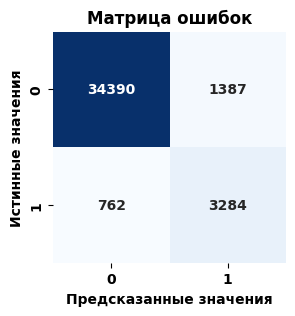

In [26]:
# построение матрицы ошибок для лучшей модели
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", cbar = False)
plt.xlabel("Предсказанные значения")
plt.ylabel("Истинные значения")
plt.title("Матрица ошибок")
plt.show()

**Вывод**

1. Выполнен этапа подготовки данных:
    * проведено разделение набора данных на обучающую и тестовую выборки;
2. Выполнены подготовка набора моделей и обучение на тренировочных данных:
    * проведена инициализация словаря моделей и их параметров:
        * LogisticRegression - модель логистической регрессии;
        * DecisionTreeClassifier - модель дерева решений.
    * проведено обучение моделей на тренировочных данных с результатами:
        * **LogisticRegression**
            * Лучшие параметры: {'solver': 'newton-cg', 'random_state': 42, 'class_weight': 'balanced'}
            * Среднее F1-score по CV: 0.76
        * **DecisionTreeClassifier**
            * Лучшие параметры: {'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'class_weight': 'balanced'}
            * Среднее F1-score по CV: 0.60
3. Выполнен этап выбора лучшей модели и оценка на тестовом наборе данных:
    * выбрана лучшая модель на основе метрики F1: **LogisticRegression**;
    * оценка качества лучшей модели на тестовом наборе данных: **F1-SCORE на тестовой выборке: 0.75**;
    * построена матрица ошибок для лучшей модели:
        * модель допускает больше ложноположительных срабатываний, чем ложноотрицательных - модель чаще определяет нормальный комментарий как токсичный, чем пропускает токсичный комментарий.

**Модель логистической регрессии удовлетворяет требованию выполнения задания - метрика F1-score должна быть не меньше 0.75.**

## Общий вывод <a class = 'anchor' id = 'Вывод'></a>

1. Импортированы библиотеки Python:
    * для манипулирования данными:
        * pandas;
        * numpy.
    * для визуализации данных:
        * matplotlib.pyplot;
        * seaborn.
    * для решения задач машинного обучения:
        * модели машинного обучения:
            * LogisticRegression - модель логистической регрессии;
            * DecisionTreeClassifier - модель дерева решений;
        * метрики оценки эффективности моделей классификации:
            * f1_score - взвешенная метрика F1;
            * confusion_matrix - матрица ошибок.
        * механизмы анализа и обработки текста:
            * CountVectorizer - инструмент для векторизации текста на основе подсчета слов;
            * re - модуль для работы с регулярными выражениями;
            * nltk - библиотека для обработки естественного языка;
            * stopwords - список стоп-слов.
        * вспомогательные механизмы для задач машинного обучения:
            * train_test_split - механизм разделения данных;
            * RandomizedSearchCV - механизм поиска гиперпараметров со случайным перебором значений;
            * cross_val_score - механизм кросс-валидации;
            * shuffle - механизм перемешивания данных.
    * для отключения предупреждений.
2. Инициализированы переменные:
    * **TEST_SIZE** для фиксирования размера тестовой выборки при разбиении наборов данных;
    * **RANDOM_STATE** для фиксирования случайности.
3. Данные загружены в рабочую среду Jupyter Notebook. Инициализирована переменная **comments**;
4. Выведена на экран общая информация о наборе данных:
    * В наборе данных **отсутствуют пустые значения**;
    * В наборе данных **159_292 строк**;
    * В наборе данных **2 столбца**:
        * text - содержание комментария пользователя;
        * toxic - таргет: является ли комментарий токсичным.
5. Баланс классов в столбце **toxic** составляет:
    * 0 - 89.84%;
    * 1 - 10.16%.
6. Столбец 'Unnamed: 0' удален из набора данных по причине повторения индексации записей;
7. Значения в столбце 'text' приведены к нижнему регистру;
8. Проведена инициализация пользовательской функции **clear_text** для удаления лишних символов. **Все символы, кроме латинских букв и пробелов удалены из текста**;
9. Инициализирована пользовательская функция для лемматизации текста: **lemmatize_text**. Функция применена к столбцу 'text' набора данных;
10. Подготовлен мешок слов и проведена обработка стоп-слов;
11. Сформирована область признаков и вектор целевой переменной - инициализированы переменные **X** и **y** соответственно.
12. Выполнен этапа подготовки данных:
    * проведено разделение набора данных на обучающую и тестовую выборки;
13. Выполнены подготовка набора моделей и обучение на тренировочных данных:
    * проведена инициализация словаря моделей и их параметров:
        * LogisticRegression - модель логистической регрессии;
        * DecisionTreeClassifier - модель дерева решений.
    * проведено обучение моделей на тренировочных данных с результатами:
        * **LogisticRegression**
            * Лучшие параметры: {'solver': 'newton-cg', 'random_state': 42, 'class_weight': 'balanced'}
            * Среднее F1-score по CV: 0.76
        * **DecisionTreeClassifier**
            * Лучшие параметры: {'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'class_weight': 'balanced'}
            * Среднее F1-score по CV: 0.60
14. Выполнен этап выбора лучшей модели и оценка на тестовом наборе данных:
    * выбрана лучшая модель на основе метрики F1: **LogisticRegression**;
    * оценка качества лучшей модели на тестовом наборе данных: **F1-SCORE на тестовой выборке: 0.75**;
    * построена матрица ошибок для лучшей модели:
        * модель допускает больше ложноположительных срабатываний, чем ложноотрицательных - модель чаще определяет нормальный комментарий как токсичный, чем пропускает токсичный комментарий.

**Модель логистической регрессии удовлетворяет требованию выполнения задания - метрика F1-score должна быть не меньше 0.75.**